In [35]:
import requests
import requests
import numpy as np, matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential

In [36]:
tesla_data = pd.read_csv("tesla_data.csv")
tesla_data

,Date,Open,High,Low,Close,Volume
0,2021-01-05,241.220,246.947,239.7330,245.037,96735495
1,2021-01-06,252.830,258.000,249.7000,251.993,134099895
2,2021-01-07,259.210,272.330,258.4000,272.013,154496844
3,2021-01-08,285.333,294.830,279.4630,293.340,225166584
4,2021-01-11,283.133,284.810,267.8740,270.397,178662438
...,...,...,...,...,...,...
634,2023-07-14,277.010,285.300,276.3100,281.380,120062369
635,2023-07-17,286.625,292.230,283.5700,290.380,131569593
636,2023-07-18,290.150,295.260,286.0100,293.340,112434713
637,2023-07-19,296.040,299.290,289.5201,291.260,142355353


In [37]:
close_= tesla_data.loc[:,'Close']
close_= np.array(close_).astype(float)


In [38]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

close_sc =sc.fit_transform(np.array(close_).reshape(-1,1))
close_sc[637]

array([0.60675125])

In [39]:
#Splitting 65% data to train
length =len(close_sc)
train_len = int(length*0.65)
test_len = length - train_len
print("Train and test lengths:",train_len,test_len)

#Assinging values
train = close_sc[:train_len]
test = close_sc[train_len:]

print(train.shape,test.shape)

Train and test lengths: 415 224
(415, 1) (224, 1)


In [40]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [41]:
time_step =100
x_train,y_train = create_dataset(train,time_step)
x_test,y_test = create_dataset(test,time_step)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
x_train

(314, 100) (314,) (123, 100) (123,)


array([[0.45362905, 0.47667208, 0.54299202, ..., 0.30961341, 0.32556067,
        0.33850002],
       [0.47667208, 0.54299202, 0.61364163, ..., 0.32556067, 0.33850002,
        0.33228542],
       [0.54299202, 0.61364163, 0.53763872, ..., 0.33850002, 0.33228542,
        0.33082784],
       ...,
       [0.84991221, 0.83181502, 0.83953357, ..., 0.64521151, 0.62466293,
        0.60228906],
       [0.83181502, 0.83953357, 0.906738  , ..., 0.62466293, 0.60228906,
        0.62395402],
       [0.83953357, 0.906738  , 0.84689767, ..., 0.60228906, 0.62395402,
        0.62608739]])

In [42]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)
print(x_train.shape)

(314, 100, 1)


In [9]:
model =Sequential()
model.add(LSTM(50,return_sequences =True,input_shape =(100,1)))
model.add(LSTM(50,return_sequences =True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer ='adam')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [11]:
import time
start = time.time()
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)
end = time.time()
print("Time taken for 100 epochs", end-start)

Epoch 1/100
5/5 [==============================] - 6s 409ms/step - loss: 0.2267 - val_loss: 0.0107
Epoch 2/100
5/5 [==============================] - 1s 154ms/step - loss: 0.0442 - val_loss: 0.0220
Epoch 3/100
5/5 [==============================] - 1s 140ms/step - loss: 0.0188 - val_loss: 0.0088
Epoch 4/100
5/5 [==============================] - 1s 142ms/step - loss: 0.0286 - val_loss: 0.0078
Epoch 5/100
5/5 [==============================] - 1s 138ms/step - loss: 0.0138 - val_loss: 0.0171
Epoch 6/100
5/5 [==============================] - 1s 142ms/step - loss: 0.0167 - val_loss: 0.0169
Epoch 7/100
5/5 [==============================] - 1s 143ms/step - loss: 0.0129 - val_loss: 0.0087
Epoch 8/100
5/5 [==============================] - 1s 150ms/step - loss: 0.0131 - val_loss: 0.0085
Epoch 9/100
5/5 [==============================] - 1s 151ms/step - loss: 0.0115 - val_loss: 0.0112
Epoch 10/100
5/5 [==============================] - 1s 146ms/step - loss: 0.0117 - val_loss: 0.0108
Epoch 11/

5/5 [==============================] - 1s 148ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 84/100
5/5 [==============================] - 1s 156ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 85/100
5/5 [==============================] - 1s 139ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 86/100
5/5 [==============================] - 1s 147ms/step - loss: 0.0029 - val_loss: 0.0033
Epoch 87/100
5/5 [==============================] - 1s 147ms/step - loss: 0.0029 - val_loss: 0.0034
Epoch 88/100
5/5 [==============================] - 1s 138ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 89/100
5/5 [==============================] - 1s 146ms/step - loss: 0.0030 - val_loss: 0.0036
Epoch 90/100
5/5 [==============================] - 1s 138ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 91/100
5/5 [==============================] - 1s 146ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 92/100
5/5 [==============================] - 1s 137ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 93/100


In [13]:
from keras.models import load_model
model.save("tesla_model.h5")


In [62]:
model = load_model("tesla_model.h5")

In [63]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)

4/4 [==============================] - 0s 28ms/step


In [64]:
import math
from sklearn.metrics import mean_squared_error
print("Train error: ",math.sqrt(mean_squared_error(y_train,train_predict)))
print("Test error: ",math.sqrt(mean_squared_error(y_test,test_predict)))    

Train error:  287.55189851481214
Test error:  202.19288003687095


In [65]:
look_back=100
trainPredictPlot = np.empty_like(close_)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close_)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_)-1, :] = test_predict
# plot baseline and predictions
plt.plot((close_))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [66]:
test[124:130]

array([[0.32971147],
       [0.32335111],
       [0.31361182],
       [0.27429026],
       [0.29711465],
       [0.28393017]])

In [67]:
print(len(test))
x_input = test[124:].reshape(1,-1)
x_input.shape


224


(1, 100)

In [68]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input[:10]

[0.3297114652002518,
 0.323351111405572,
 0.3136118196574685,
 0.2742902573955677,
 0.2971146520025177,
 0.2839301686156293,
 0.2637227945804486,
 0.24480736740981218,
 0.21472819425580542,
 0.2164507900751979]

In [69]:
x_input.shape

(1, 100)

In [70]:
from numpy import array
lst_output = []
n_steps =100
i =0 
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)        

[0.6197478]
101
1 day input [0.32335111 0.31361182 0.27429026 0.29711465 0.28393017 0.26372279
 0.24480737 0.21472819 0.21645079 0.21989598 0.24898135 0.23967271
 0.25186338 0.23861265 0.24894822 0.29641899 0.27511843 0.278663
 0.27266704 0.2773048  0.26862557 0.28416206 0.28879981 0.32914831
 0.28711035 0.27985557 0.25646802 0.25494418 0.2531222  0.26067513
 0.23997085 0.25772684 0.25474542 0.2615033  0.25245967 0.24013648
 0.18183324 0.18875675 0.18037566 0.17414781 0.15122404 0.17255772
 0.18620598 0.17799053 0.17295525 0.17394905 0.17590353 0.20525392
 0.21098486 0.20223937 0.20021864 0.21194554 0.19836353 0.19296386
 0.19352701 0.21784212 0.22787955 0.23864577 0.26756551 0.25729619
 0.24778878 0.2529897  0.28181005 0.3082784  0.31745453 0.32934707
 0.35071388 0.36277205 0.37502899 0.38582834 0.41991586 0.45151887
 0.46950674 0.49892338 0.49256302 0.48961473 0.50498559 0.55106503
 0.50140789 0.51846821 0.49193361 0.44042137 0.47076556 0.49074105
 0.49491503 0.50906019 0.56885414 0.

8 day output [[0.69959843]]
9 day input [0.21645079 0.21989598 0.24898135 0.23967271 0.25186338 0.23861265
 0.24894822 0.29641899 0.27511843 0.278663   0.27266704 0.2773048
 0.26862557 0.28416206 0.28879981 0.32914831 0.28711035 0.27985557
 0.25646802 0.25494418 0.2531222  0.26067513 0.23997085 0.25772684
 0.25474542 0.2615033  0.25245967 0.24013648 0.18183324 0.18875675
 0.18037566 0.17414781 0.15122404 0.17255772 0.18620598 0.17799053
 0.17295525 0.17394905 0.17590353 0.20525392 0.21098486 0.20223937
 0.20021864 0.21194554 0.19836353 0.19296386 0.19352701 0.21784212
 0.22787955 0.23864577 0.26756551 0.25729619 0.24778878 0.2529897
 0.28181005 0.3082784  0.31745453 0.32934707 0.35071388 0.36277205
 0.37502899 0.38582834 0.41991586 0.45151887 0.46950674 0.49892338
 0.49256302 0.48961473 0.50498559 0.55106503 0.50140789 0.51846821
 0.49193361 0.44042137 0.47076556 0.49074105 0.49491503 0.50906019
 0.56885414 0.57766588 0.55798854 0.55099877 0.53503164 0.53562792
 0.54291582 0.56249379 0

16 day output [[0.79895335]]
17 day input [0.27511843 0.278663   0.27266704 0.2773048  0.26862557 0.28416206
 0.28879981 0.32914831 0.28711035 0.27985557 0.25646802 0.25494418
 0.2531222  0.26067513 0.23997085 0.25772684 0.25474542 0.2615033
 0.25245967 0.24013648 0.18183324 0.18875675 0.18037566 0.17414781
 0.15122404 0.17255772 0.18620598 0.17799053 0.17295525 0.17394905
 0.17590353 0.20525392 0.21098486 0.20223937 0.20021864 0.21194554
 0.19836353 0.19296386 0.19352701 0.21784212 0.22787955 0.23864577
 0.26756551 0.25729619 0.24778878 0.2529897  0.28181005 0.3082784
 0.31745453 0.32934707 0.35071388 0.36277205 0.37502899 0.38582834
 0.41991586 0.45151887 0.46950674 0.49892338 0.49256302 0.48961473
 0.50498559 0.55106503 0.50140789 0.51846821 0.49193361 0.44042137
 0.47076556 0.49074105 0.49491503 0.50906019 0.56885414 0.57766588
 0.55798854 0.55099877 0.53503164 0.53562792 0.54291582 0.56249379
 0.57402193 0.60383609 0.61364163 0.60675125 0.51280352 0.61974782
 0.61993569 0.62461478

27 day output [[0.7970132]]
28 day input [0.25494418 0.2531222  0.26067513 0.23997085 0.25772684 0.25474542
 0.2615033  0.25245967 0.24013648 0.18183324 0.18875675 0.18037566
 0.17414781 0.15122404 0.17255772 0.18620598 0.17799053 0.17295525
 0.17394905 0.17590353 0.20525392 0.21098486 0.20223937 0.20021864
 0.21194554 0.19836353 0.19296386 0.19352701 0.21784212 0.22787955
 0.23864577 0.26756551 0.25729619 0.24778878 0.2529897  0.28181005
 0.3082784  0.31745453 0.32934707 0.35071388 0.36277205 0.37502899
 0.38582834 0.41991586 0.45151887 0.46950674 0.49892338 0.49256302
 0.48961473 0.50498559 0.55106503 0.50140789 0.51846821 0.49193361
 0.44042137 0.47076556 0.49074105 0.49491503 0.50906019 0.56885414
 0.57766588 0.55798854 0.55099877 0.53503164 0.53562792 0.54291582
 0.56249379 0.57402193 0.60383609 0.61364163 0.60675125 0.51280352
 0.61974782 0.61993569 0.62461478 0.63326848 0.64455074 0.65735108
 0.67099816 0.68514413 0.69959843 0.7142055  0.72877926 0.74307466
 0.75678813 0.7695733

In [71]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(close_)

639

In [79]:
day_new.shape
close_[539:].shape


(100,)

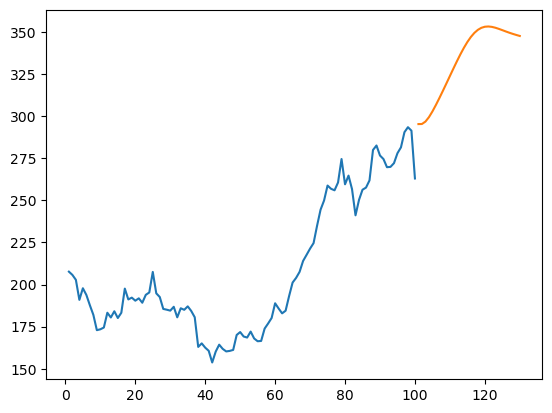

In [78]:
plt.plot(day_new,(close_[539:639]))
plt.plot(day_pred,sc.inverse_transform(lst_output))

In [77]:
close_[538:639]

array([196.88, 207.63, 205.71, 202.77, 190.9 , 197.79, 193.81, 187.71,
       182.  , 172.92, 173.44, 174.48, 183.26, 180.45, 184.13, 180.13,
       183.25, 197.58, 191.15, 192.22, 190.41, 191.81, 189.19, 193.88,
       195.28, 207.46, 194.77, 192.58, 185.52, 185.06, 184.51, 186.79,
       180.54, 185.9 , 185.  , 187.04, 184.31, 180.59, 162.99, 165.08,
       162.55, 160.67, 153.75, 160.19, 164.31, 161.83, 160.31, 160.61,
       161.2 , 170.06, 171.79, 169.15, 168.54, 172.08, 167.98, 166.35,
       166.52, 173.86, 176.89, 180.14, 188.87, 185.77, 182.9 , 184.47,
       193.17, 201.16, 203.93, 207.52, 213.97, 217.61, 221.31, 224.57,
       234.86, 244.4 , 249.83, 258.71, 256.79, 255.9 , 260.54, 274.45,
       259.46, 264.61, 256.6 , 241.05, 250.21, 256.24, 257.5 , 261.77,
       279.82, 282.48, 276.54, 274.43, 269.61, 269.79, 271.99, 277.9 ,
       281.38, 290.38, 293.34, 291.26, 262.9 ])